# Разбор задач контеста "Good Bye 2020"

## Задача А "Коровья дилемма"

Формализированное условие задачи: На прямоугольной системе координат стоит точка с координатами (0, 1). Дан массив из чисел. Нужно подчитать количество треугольников с различными площадями, точки которых стоят в координатах (i, 0)

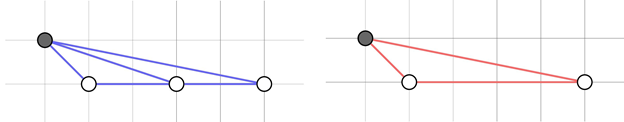

На интуитивном уровне можно догадаться, что если для двух треугольников с вершинами (0, 1) (x1, 0) (x2, 0) и (0, 1) (x3, 0) (x4, 0) соответственно выполняеться равенство |x1 - x2| = |x3 - x4|, то эти треугольники имеют одинаковую площадь. Это доказываеться тем, что медиана любой стороны треугольника делит его на два треугольника с равными площадями

То есть, длины сторон, паралельные оси OX должны быть равны.

И так, задача свелась к квадратичному перебору всех возможных пар. Мы можем использовать такой алгоритм, так как ограничения нам это позволяют: 

1≤t≤100

1≤n≤50

Время - 1 секунда

Итого: сложность нашего алгоритма - порядка O(N^2 * t), что равняеться O(50^2 * 100) = O(250000)

In [ ]:
for _ in range(int(input())): # в условии несколько тестов, по этому мы пишем цикл, который проходит по всем тестам
    n = int(input()) # считываем N - длинну массива точек
    x = list(map(int, input().split())) # считываем сам массив точек. Каждая точка имеет координаты (0, x[i])
    y = set() # создаем структуру данных set (массив неповторяющихся элементов)
    for i in range(n - 1): # внешний цикл идет до предпоследнего элемета массива
        for j in range(i + 1, n): # внутрений цикл идет от i + 1 элемента массива и до конца
            y.add(abs(x[i] - x[j])) # добавляем модуль разницы |x[i] - x[j]|, то бишь длинну стороны, паралельной оси OX
    print(len(y)) # выводим ответ - количество уникальных длин сторон, паралельных оси OX, что равняеться количеству уникальных
    # площадей

## Задача B "Улучшения в последнюю минуту"

Формализированное условие задачи: Дан отсортированный по неубыванию массив чисел. Мы можем увеличить каждый элемент на единицу ровно один раз. Нужно подсчитать максимально возможное количество уникальных элеметов, полученых после выполнения этих операций над массивом

Лично у меня было очень много идей по поводу этой задачи, но они оказывались неверными. Пока я не пришел к очень простой по реализации идее:

1. Логично, что в любом случае оптимально увеличить последний элемент на 1
2. Идем с предпоследнего элемента массива до нулевого
3. Если увеличив i-ий элемент на 1 мы получим следующий элемент, то совершать это действие бессмысленно
4. В подпоследовательности одинаковых чисел оптимально увеличивать только самое последнее число

Рассмотрим условия (пункты 3 и 4) поближе: Пусть у нас есть последовательность чисел 1 2 3 3 3 4 5 Если с 3-им условием всё понятно, то с четвертым не совсем. Попробуем вручную проделать этот алгоритм без 4-го пункта:

1 2 3 3 3 4 5

1 2 3 3 3 4 **6**

1 2 3 3 3 **5** 6

1 2 3 3 **4** 5 6

1 2 4 **3** 4 5 6 - тройку увеличивать бессмысленно

1 2 **4** 3 4 5 6 - но следующую тройку мы увеличиваем

1 **3** 3 3 4 5 6 - соответственно двойку мы увеличиваем

**2** 3 3 3 4 5 6 - и единицу тоже

В итоге получаем последовательность 2 3 3 3 4 5 6 из 5 уникальных элементов

Но существует последовательность с большим количеством уникальных элементов: 1 2 3 3 4 5 6 (6 уникальных элементов)

Вот почему нам выгодно увеличивать только последний элемент подпоследовательности одинаковый элементов (или вовсе его не увеличивать). Мы попросту можем увеличить потом другой элемент, не зная, что такой уже существует, таким образом потеряя его уникальность

In [ ]:
for _ in range(int(input())): # цикл для нескольких тестов
    n = int(input()) # считываем N - длинну массива
    s = list(map(int, input().split())) # считываем сам массив
    s[-1] += 1 # увеличиваем последний элемент массива
    for i in range(len(s) - 2, -1, -1): # идем от предпоследнего элемента до нулевого
        if s[i] + 1 != s[i + 1] and s[i] != s[i + 1]: # если увеличив i-й элемент мы не получим следующий и если i-й не равен
            # следующему (если это подпоследовательность элементов, то мы проверяем, находимся ли мы в его конце, а если
            # этот элемент уникальный, то это условие выполниться)
            s[i] += 1 # увеличиваем i-й элемент на единицу
    print(len(set(s))) # превращаем наш массив  в set (массив уникальных элементов) и выводим его длинну

## Задача C "Псиная поэзия"

Дана строка, состоящая только из строчных английский букв. Нужно вывести минимальное количество символов, которые нужно заменить, чтобы любая подстрока длины больше 1 не была палиндромом

Основное, что нужно заметить, что внутри любого палиндрома длинной более 3 существуют палиндромы длинной 2 и/или 3

Проверим это утверждение:

zer**oo**rez

ab**cdc**ba

Значит, нам нужно проверить все палиндромы длинны 2 и 3, и позаменять в них самый правый символ (если мы заменяем правый символ, то этим мы можем отсечь некоторые следующие палиндромы)

В данном коде мы будем не заменять символы, а создадим массив changed длинны N заполненный нулями, и если мы будем менять i-й символ, то в changed\[i\] будет записана единица

Ответом будет количество единиц в массиве changed

In [ ]:
for _ in range(int(input())): # цикл для нескольких тестов
    s = input() # считываем строку
    ans = 0 # создаем переменную для ответа
    used = [0] * len(s) # создаем массив
    for i in range(1, len(s)): # проходим по строке начиная с первого символа (i - конец подстроки длинны 2 или 3)
        use_need = 0 # устанавливаем use_need (нужно ли нам менять этот символ) в значение 0 (False)
        if s[i] == s[i - 1] and used[i - 1] == 0: # если у нас палиндром длинны 2 и предыдущий символ не заменен
            # (если бы он был заменен, то палиндрома бы не было)
            use_need = 1 # тогда use_need = 1 (этот символ надо менять)
        if i > 1 and s[i] == s[i - 2] and used[i - 2] == 0: # если i > 1 (можем взять подстроку длинны 3),
            # i-й симол равен (i - 2)-му симолу (проверка на палиндром) и (i - 2)-й символ не был заменен
            use_need = 1 # тогда use_need = 1 (этот символ надо менять)
        used[i] = use_need # если i-й символ надо менять, то единица записываеться в used[i]
        ans += use_need # в ответ добавляем единицу, если этот символ надо менять
    print(ans) # выводим ответ

Я считаю, что разбирать следующие задачи нету особого смысла, так как они значительно сложнее в понимании для нас. Разбор был подготовлен по моему коду и [материалам разбора авторами задач](https://codeforces.com/blog/entry/86126). Авторский разбор доступен только на английском языке